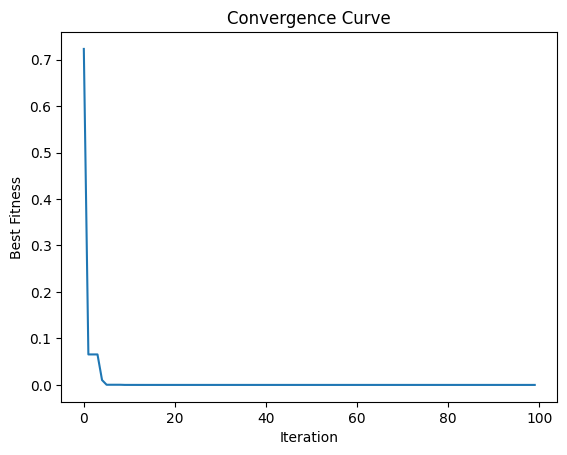

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return np.sum(x**2)

class Particle:
    def __init__(self, dimensions, lower_bound, upper_bound):
        self.position = np.random.uniform(lower_bound, upper_bound, dimensions)
        self.velocity = np.zeros(dimensions)
        self.best_position = self.position.copy()
        self.best_fitness = float('inf')

def particle_swarm_optimization(objective_function, num_particles, num_iterations, dimensions, lower_bound, upper_bound, inertia_weight, cognitive_weight, social_weight):
    swarm = [Particle(dimensions, lower_bound, upper_bound) for _ in range(num_particles)]

    global_best_position = None
    global_best_fitness = float('inf')

    history = []

    for iteration in range(num_iterations):
        for particle in swarm:
            fitness = objective_function(particle.position)

            if fitness < particle.best_fitness:
                particle.best_position = particle.position.copy()
                particle.best_fitness = fitness

            if fitness < global_best_fitness:
                global_best_position = particle.position.copy()
                global_best_fitness = fitness

            particle.velocity = (inertia_weight * particle.velocity +
                                 cognitive_weight * np.random.uniform(0, 1) * (particle.best_position - particle.position) +
                                 social_weight * np.random.uniform(0, 1) * (global_best_position - particle.position))

            particle.position += particle.velocity
            particle.position = np.clip(particle.position, lower_bound, upper_bound)

        history.append(global_best_fitness)

    return global_best_position, global_best_fitness, history

# Set the parameters
num_particles = 50
num_iterations = 100
dimensions = 2
lower_bound = -5
upper_bound = 5
inertia_weight = 0.5
cognitive_weight = 0.8
social_weight = 0.8

# Run the Particle Swarm Optimization algorithm
best_position, best_fitness, history = particle_swarm_optimization(objective_function, num_particles, num_iterations,
                                                                   dimensions, lower_bound, upper_bound,
                                                                   inertia_weight, cognitive_weight, social_weight)

# Plot the convergence curve
plt.plot(history)
plt.xlabel('Iteration')
plt.ylabel('Best Fitness')
plt.title('Convergence Curve')
plt.show()

